In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataframe = pd.read_csv("Zomato-data-.csv")
print(dataframe.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [3]:
##Convert the rate column to a float by removing denominator characters

def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)

dataframe['rate']=dataframe['rate'].apply(handleRate)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [7]:
##Getting summary of the dataframe 

dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [105]:
## Checking for missing or null values to identify any data gaps.

print(dataframe.isnull().sum())

Text(0.5, 0, 'Types of Restaurant')

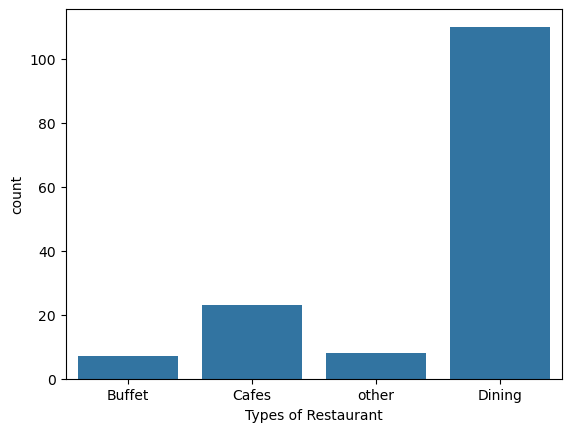

In [34]:
## Let's see the listed_in (type) column to identify popular restaurant categories.

sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("Types of Restaurant")

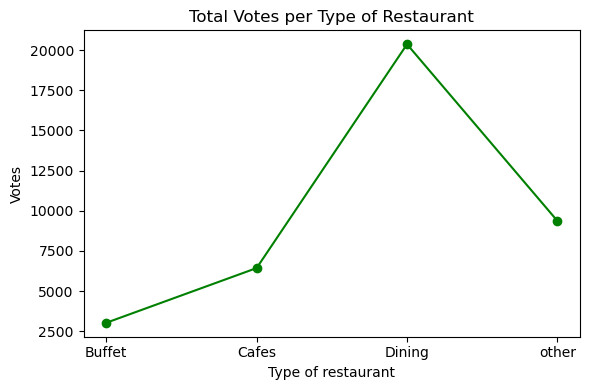

In [52]:
## count of votes for each category.

grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})

plt.figure(figsize=(6, 4))  # Optional: bigger figure
plt.plot(result.index, result['votes'], c='green', marker='o')
plt.xlabel('Type of restaurant')
plt.ylabel('Votes')
plt.title('Total Votes per Type of Restaurant')
plt.tight_layout()
plt.show()


In [60]:
##Find the restaurant with the highest number of votes.

max_votes = dataframe['votes'].max()
restaurant_with_max_votes = dataframe.loc[dataframe['votes'] == max_votes, 'name']

print('Restaurant(s) with the maximum votes:')
print(restaurant_with_max_votes)

Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


<Axes: xlabel='online_order', ylabel='count'>

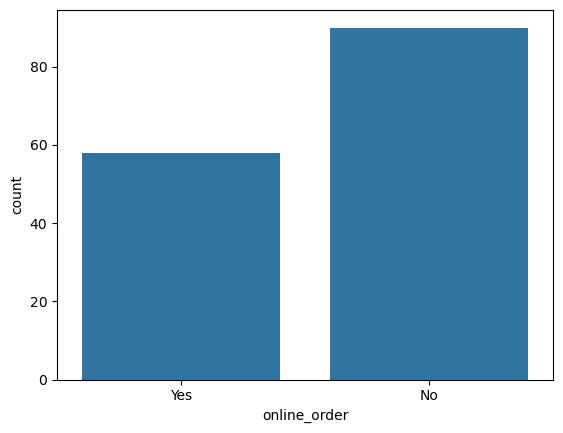

In [103]:
##Exploring the online_order column to see how many restaurants accept online orders.

sns.countplot(x=dataframe['online_order'])

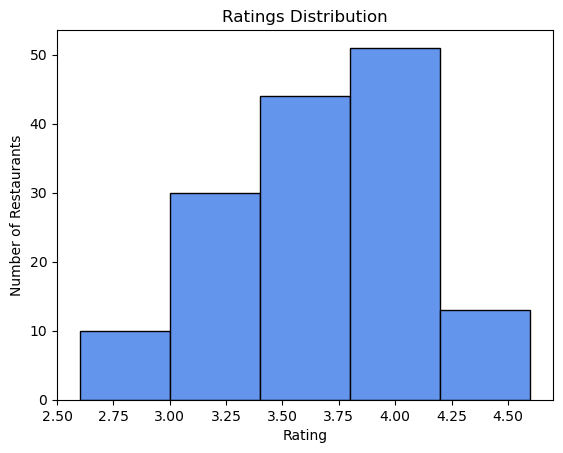

In [53]:
##Checking the distribution of ratings from the rate column.

plt.hist(dataframe['rate'], bins=5, color='cornflowerblue', edgecolor='black')
plt.title('Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Number of Restaurants')
plt.show()


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

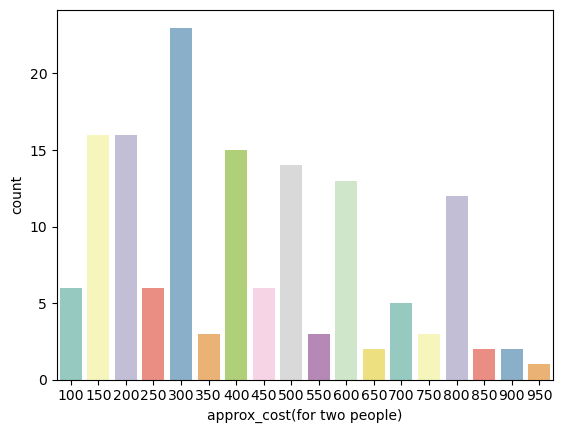

In [77]:
##Analyze the approx_cost(for two people) column to find the preferred price range.

couple_data = dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data, hue= couple_data, palette= 'Set3', legend=False)

<Axes: xlabel='online_order', ylabel='rate'>

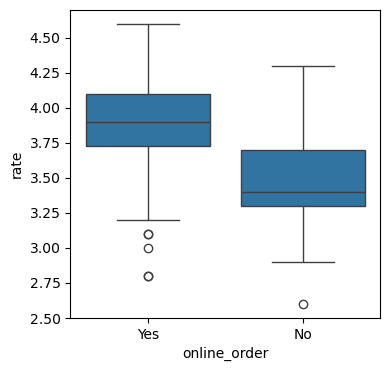

In [85]:
##Compare ratings between restaurants that accept online orders and those that don't.

plt.figure(figsize=(4,4))
sns.boxplot(x='online_order', y='rate', data= dataframe)

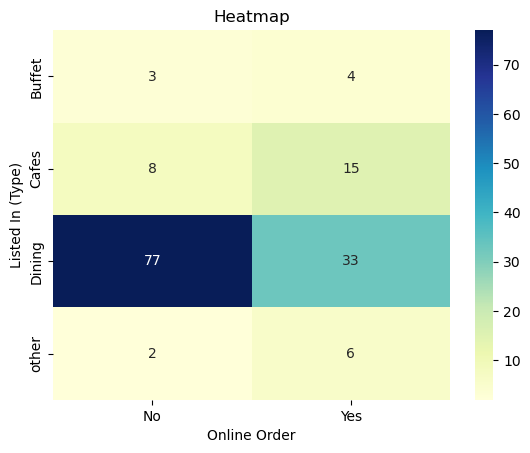

In [101]:
##Find the relationship between order mode (online_order) and restaurant type (listed_in(type)).

pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()